IMPORT DATA

# Import Data

In [1]:
#Importing General Library
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

#Sklearn Library
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

#Keras Library
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#NLTK Library
import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('brown')
nltk.download('omw-1.4')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

#Import yellowbrick Library
#pip install -U yellowbrick ######
from yellowbrick.classifier import PrecisionRecallCurve

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


READING DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive') 
df0 = pd.read_excel("/content/drive/My Drive/Output Womens Clothing E-Commerce Reviews.xlsx")
df = df0.copy()

Mounted at /content/drive


FileNotFoundError: ignored

EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION

FEATURE SELECTION & DATA CLEANING

Feature Selection

In [ ]:
df.columns

In [ ]:
df.drop(['Clothing ID', 'Rating', 'Recommended IND', 'Size', 'Material', 'Longevity','General', 'Comfort'], axis=1, inplace=True)

In [ ]:
df['ReviewText'].isnull().value_counts()

In [ ]:
df['Sentiment'].isnull().value_counts()

In [ ]:
df = df.dropna()

In [ ]:
df['ReviewText'].isnull().value_counts()

In [ ]:
df['Sentiment'].isnull().value_counts()

In [ ]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

In [ ]:
missing_values(df)

In [ ]:
blanks = []  # start with an empty list

for rv in df.itertuples(): # iterate over the DataFrame
    if type(rv)==str and rv.isspace(): # avoid NaN values and test 'review' for whitespace
        blanks.append(i)
blanks

In [ ]:
df["ReviewText"].str.isspace().sum()

In [ ]:
df[df["ReviewText"].str.isspace() == True].index

In [ ]:
df.head()

In [ ]:
df.info()

TEXT MINING

# Text Mining

Tokenization, Noise Removal & Lexicon Normalization

In [ ]:
def cleaning_fsa(data):
    
    import re
    #1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]','', data)
         
    #2. Tokenize
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
from nltk.corpus import brown
brown.words()
text = cleaning_fsa(str(df["ReviewText"]))
text

In [ ]:
df["ReviewText"] = df["ReviewText"].apply(cleaning_fsa)
df["ReviewText"].head()

In [ ]:
df.head(3)

Handling With Rare Words

# Handling Rare Words

In [ ]:
" ".join(df["ReviewText"]).split()

In [ ]:
word_values = pd.Series(" ".join(df["ReviewText"]).split()).value_counts()
word_values

In [ ]:
rare_words = word_values[word_values <= 2]
rare_words

In [ ]:
rare_words.value_counts()

In [ ]:
len(rare_words)

In [ ]:
rare_words.index

In [ ]:
df["ReviewText"] = df["ReviewText"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df["ReviewText"].head()

In [ ]:
df.info()

In [ ]:
df.head(3)

# The Detection of Positive and Negative Reviews

In [ ]:
df.columns

In [ ]:
df[df["Sentiment"] == 0]

In [ ]:
df[df["Sentiment"] == 1]

In [ ]:
df["Sentiment"].value_counts()

The Collection of Positive and Negative Words

In [ ]:
" ".join(df["ReviewText"]).split()

In [ ]:
neg_words = " ".join(df[df["Sentiment"] == 0].ReviewText).split()
neg_words 

In [ ]:
pos_words =" ".join(df[df["Sentiment"] == 1].ReviewText).split()
pos_words

# SENTIMENT CLASSIFICATION WITH MACHINE LEARNING & DEEP LEARNING

Logistic Regression,
Naive Bayes,
Support Vector Machine,
LSTM Model,

Train | Test & Split

In [ ]:
X = df["ReviewText"]
y= df["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

Vectorization

In [ ]:
X_train

23398    tried color really pretty fun want pair comfy ...
7425     overall soft material cute pattern definitely ...
106      stunning beautiful elegant comfortable silk pr...
7507     dress beautiful many level color print amazing...
7484     bought based review miss color vibrant picture...
                               ...                        
6876     saw store decided try pretty fit perfect think...
318      comfortable shirt light weight top lovely flor...
63       live hawaii always looking comfortable light b...
7470     love dress think cut fabric embroidery flatter...
382      retailer hung section really top feel soft thi...
Name: ReviewText, Length: 586, dtype: object

Count Vectorization

In [ ]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
type(X_train_count)

scipy.sparse.csr.csr_matrix

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vectorizer.get_feature_names()

['able',
 'absolute',
 'absolutely',
 'accessory',
 'accurate',
 'across',
 'actually',
 'add',
 'added',
 'addition',
 'adjustable',
 'adn',
 'adorable',
 'adore',
 'afraid',
 'age',
 'agree',
 'ahead',
 'air',
 'airy',
 'ala',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'amazing',
 'amount',
 'ankle',
 'another',
 'anticipated',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'appeal',
 'appears',
 'appreciate',
 'appropriate',
 'area',
 'arm',
 'armhole',
 'armpit',
 'around',
 'arrival',
 'arrived',
 'athletic',
 'attached',
 'attention',
 'attractive',
 'available',
 'average',
 'avoid',
 'away',
 'awesome',
 'awful',
 'awkward',
 'baby',
 'back',
 'background',
 'bad',
 'badly',
 'baggy',
 'balance',
 'bare',
 'barely',
 'based',
 'basic',
 'bathing',
 'bc',
 'beach',
 'beading',
 'beautiful',
 'beautifully',
 'beauty',
 'become',
 'bed',
 'behind',
 'bell',
 'belly',
 'belt',
 'best',
 'better',
 'bib',
 'big',
 'bigger',
 'biggest',
 'billowy',

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

,able,absolute,absolutely,accessory,accurate,across,actually,add,added,addition,...,yarn,year,yellow,yes,yet,yoga,younger,zero,zip,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF-IDF Vectorization

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,able,absolute,absolutely,accessory,accurate,across,actually,add,added,addition,...,yarn,year,yellow,yes,yet,yoga,younger,zero,zip,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    fig, ax = plt.subplots(figsize=(8, 8))
    
    plot_confusion_matrix(model, X_test, y_test, ax=ax)

Word2Vec 

In [ ]:
from gensim.models import Word2Vec
w2v = Word2Vec(X_train, min_count=1, size = 5)

TypeError: ignored

MACHINE & DEEP LEARNING MODELLING

Logistic Regression

Logistic Regression With Count Vectorizor

In [ ]:
log = LogisticRegression(C = 0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

    Negative       0.44      0.44      0.44         9
     Neutral       0.36      0.33      0.34        15
    Positive       0.89      0.89      0.89       123

    accuracy                           0.81       147
   macro avg       0.56      0.56      0.56       147
weighted avg       0.81      0.81      0.81       147

Train_Set
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        38
     Neutral       0.98      1.00      0.99        60
    Positive       1.00      1.00      1.00       488

    accuracy                           1.00       586
   macro avg       0.99      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



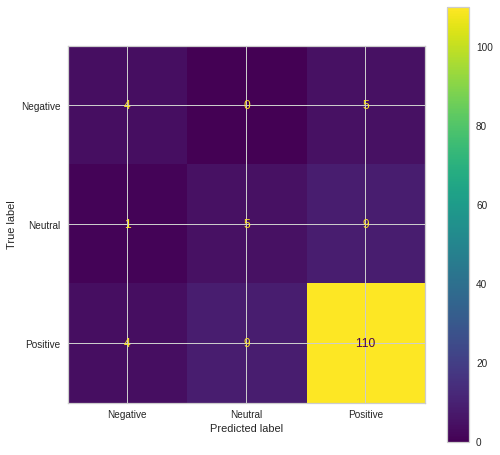

In [ ]:
print("LOG MODEL")

eval(log, X_train_count, X_test_count)

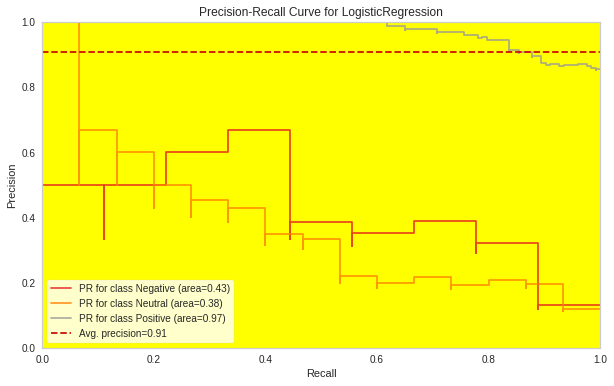

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
                            LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();
log_AP_count = viz.score_

Logistic Regression With TF-IDF Vectorizer

In [ ]:
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

    Negative       0.50      0.56      0.53         9
     Neutral       0.42      0.53      0.47        15
    Positive       0.92      0.89      0.90       123

    accuracy                           0.83       147
   macro avg       0.61      0.66      0.63       147
weighted avg       0.85      0.83      0.84       147

Train_Set
              precision    recall  f1-score   support

    Negative       0.78      1.00      0.87        38
     Neutral       0.69      0.98      0.81        60
    Positive       1.00      0.92      0.96       488

    accuracy                           0.93       586
   macro avg       0.82      0.97      0.88       586
weighted avg       0.95      0.93      0.94       586



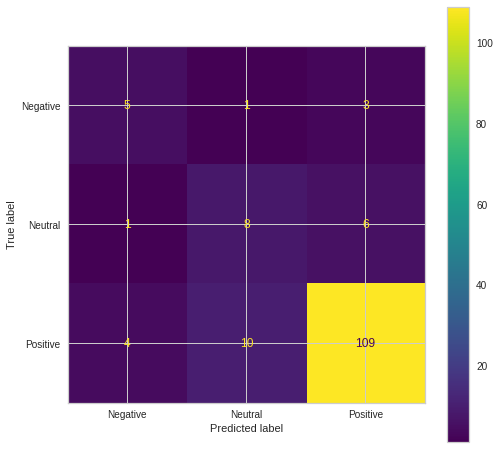

In [ ]:
print("LOG MODEL")

eval(log, X_train_tf_idf, X_test_tf_idf)

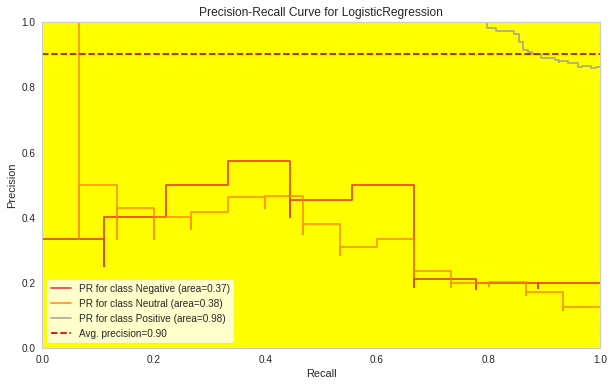

In [ ]:
viz = PrecisionRecallCurve(
                            LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced"),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
log_AP_tfidf = viz.score_

Naive Bayes

Naive Bayes With Count Vectorizor

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

    Negative       0.20      0.11      0.14         9
     Neutral       0.25      0.20      0.22        15
    Positive       0.87      0.92      0.89       123

    accuracy                           0.80       147
   macro avg       0.44      0.41      0.42       147
weighted avg       0.77      0.80      0.78       147

Train_Set
              precision    recall  f1-score   support

    Negative       0.92      0.89      0.91        38
     Neutral       0.94      0.77      0.84        60
    Positive       0.96      0.99      0.98       488

    accuracy                           0.96       586
   macro avg       0.94      0.88      0.91       586
weighted avg       0.96      0.96      0.96       586



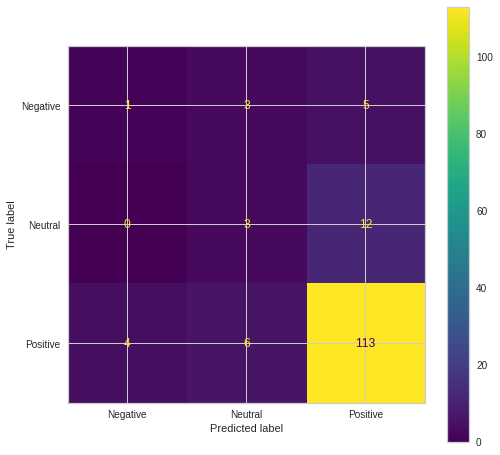

In [ ]:
print("NB MODEL")

eval(nb, X_train_count, X_test_count)

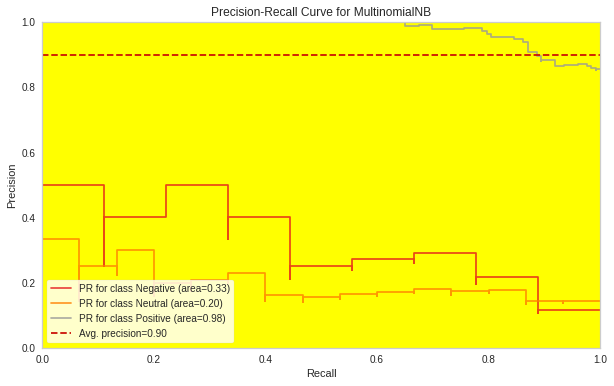

In [ ]:
viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();
nb_AP_count = viz.score_

Naive Bayes With TF-IDF Vectorizer

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         9
     Neutral       0.00      0.00      0.00        15
    Positive       0.84      1.00      0.91       123

    accuracy                           0.84       147
   macro avg       0.28      0.33      0.30       147
weighted avg       0.70      0.84      0.76       147

Train_Set
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        38
     Neutral       0.00      0.00      0.00        60
    Positive       0.83      1.00      0.91       488

    accuracy                           0.83       586
   macro avg       0.28      0.33      0.30       586
weighted avg       0.69      0.83      0.76       586



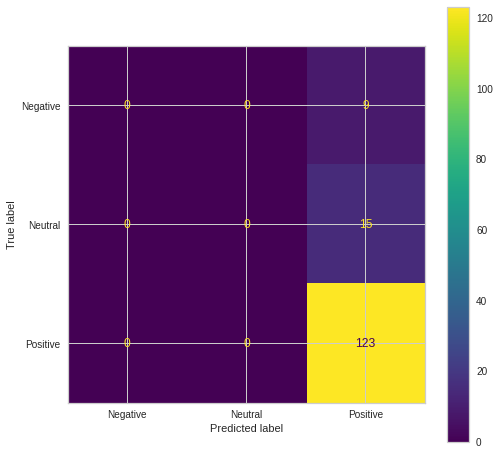

In [ ]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

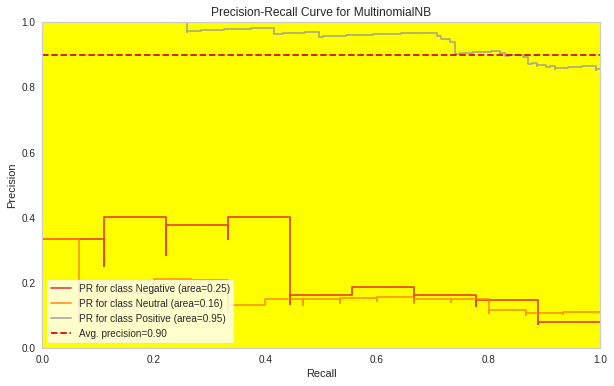

In [ ]:
viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();
nb_AP_tfidf = viz.score_

Support Vector Machine (SVM)

 Support Vector Machine (SVM) With Count Vectorizor

In [ ]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

    Negative       0.50      0.33      0.40         9
     Neutral       0.67      0.13      0.22        15
    Positive       0.86      0.97      0.91       123

    accuracy                           0.84       147
   macro avg       0.68      0.48      0.51       147
weighted avg       0.82      0.84      0.81       147

Train_Set
              precision    recall  f1-score   support

    Negative       1.00      0.95      0.97        38
     Neutral       0.96      0.87      0.91        60
    Positive       0.98      1.00      0.99       488

    accuracy                           0.98       586
   macro avg       0.98      0.94      0.96       586
weighted avg       0.98      0.98      0.98       586



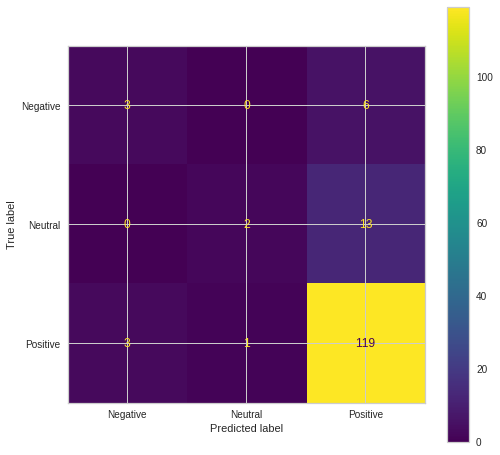

In [ ]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

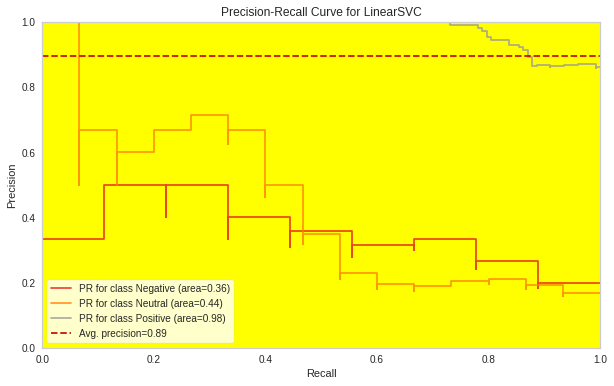

In [ ]:
viz = PrecisionRecallCurve(
                            LinearSVC(C=0.01, class_weight="balanced", random_state=101),
                            classes=svc.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();
svc_AP_count = viz.score_

Support Vector Machine (SVM) With TF-IDF Vectorizer

In [ ]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf, y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         9
     Neutral       0.00      0.00      0.00        15
    Positive       0.84      1.00      0.91       123

    accuracy                           0.84       147
   macro avg       0.28      0.33      0.30       147
weighted avg       0.70      0.84      0.76       147

Train_Set
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        38
     Neutral       0.00      0.00      0.00        60
    Positive       0.83      1.00      0.91       488

    accuracy                           0.83       586
   macro avg       0.28      0.33      0.30       586
weighted avg       0.69      0.83      0.76       586



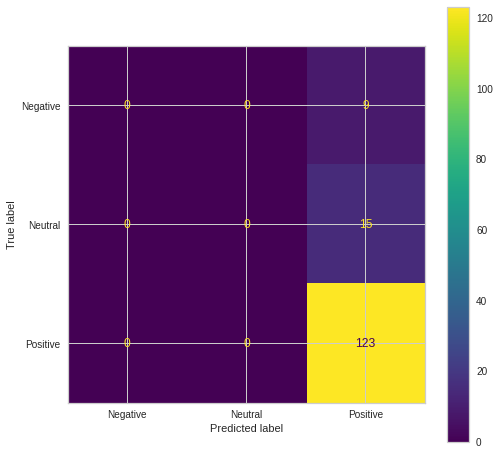

In [ ]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

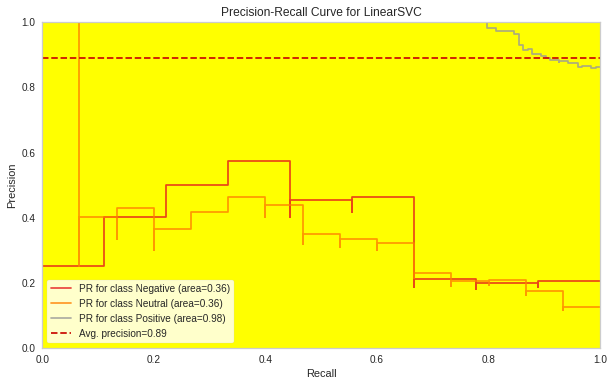

In [ ]:
viz = PrecisionRecallCurve(
                            LinearSVC(C=0.01, class_weight="balanced", random_state=101),
                            classes=svc.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();
svc_AP_tfidf = viz.score_

LSTM

Functions

In [ ]:
# functions:

# get all of strings from sentences
def get_all_str(sentences):
    sentence = ''
    for words in sentences:
        sentence += words
    sentence = sentence.lower()
    return sentence

# get string from list
def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence

# get word from text
def get_word(text): 
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
    return result

# remove stopwords from list
def remove_stopword(lst):    
    stoplist = stopwords.words('english')
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist] 
#     print(stoplist)
    return cleanwordlist

# lemmatize
def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
    return tokens

# get frequency dataframe which consists of frequency and term
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

# function to plot word cloud of words
def Word_Cloud(data, color_background, colormap, title, mask):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=340,
               mask = mask,
               colormap= colormap,
               max_font_size=200,
               min_font_size = 1 ,
               random_state=8888, 
               background_color=color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

#   function to preprocess
def preprocess(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize = lemmatization(after_removing)
    frequency_df = Freq_df(lemmatize)
    return frequency_df

# preprocess -> get frequency dataframe -> plot Word Cloud
def create_wordcloud(column, title, color, mask):
    frequency_df = preprocess(column)
    data = frequency_df.set_index('Term').to_dict()['Frequency']
    Word_Cloud(data, 'white',color,title, mask)

Define Preprocessing Function

In [ ]:
# preprocess: remove stopwords-> lemmatize
def preprocess(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize = lemmatization(after_removing)
    return lemmatize

df['Text'] = df['Text'].apply(preprocess)

KeyError: ignored

Train-Test Split

In [ ]:
X = df["ReviewText"]
y= df["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

Tokenization, Sequencing and Padding

In [ ]:
# for tokenization
def fit_tokenizer(text, oov_token):
    tokenizer = Tokenizer(oov_token = oov_token)
    tokenizer.fit_on_texts(text)
    return tokenizer

# for sequence, padding
def seq_padding(sentences, tokenizer, padding, truncating, maxlen):
    sequences = tokenizer.texts_to_sequences(sentences)    
    pad_trunc_sequences = pad_sequences(sequences, padding = padding, maxlen = maxlen, truncating=padding)
    return pad_trunc_sequences

Sequencing and Padding

In [ ]:
tokenizer = fit_tokenizer(train_X, "<OOV>")

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

train_X = seq_padding(train_X,tokenizer, 'post', 'post',max_len)
test_X = seq_padding(test_X,tokenizer, 'post', 'post', max_len) 

GloVe Embedding

In [ ]:
GLOVE_FILE = '../input/glove6b100dtxt/glove.6B.100d.txt'
GLOVE_EMBEDDINGS = {}

with open(GLOVE_FILE) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        GLOVE_EMBEDDINGS[word] = coefs

Missing Words

In [ ]:
EMBEDDINGS_MATRIX = np.zeros((VOCAB_SIZE+1, 100))

num = 0
missed_list = []

for word, i in word_index.items():
    embedding_vector = GLOVE_EMBEDDINGS.get(word)
    if embedding_vector is not None:
        EMBEDDINGS_MATRIX[i] = embedding_vector
    else:
        num += 1
        missed_list.append(word)

print('How many missed words? ',num)
print('As example: ',missed_list[:10])

Define & Train Model

In [ ]:
# define model
def LSTM_model(vocab_size, embedding_dim, maxlen, embeddings_matrix):
    
    model = Sequential()
    
    model.add(Embedding(vocab_size+1,embedding_dim,input_length = maxlen, weights = [embeddings_matrix],trainable=False))
    model.add(Bidirectional(LSTM(64,kernel_regularizer=keras.regularizers.l2(0.001))))
    model.add(Dropout(0.3))
    
    tf.keras.layers.GlobalAveragePooling1D()

    model.add(Dense(6, activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics = ['AUC']) 
    return model

In [ ]:
# fitting
model = LSTM_model(VOCAB_SIZE, 100, max_len, EMBEDDINGS_MATRIX)

history = model.fit(train_X, train_y, epochs = 60, batch_size = 128, validation_data=(test_X, test_y))

Explore AUC and Loss scores by plotting line charts:

In [ ]:
epoch = [x for x in range(1,61)]

color = ['#67001f','#b2182b','#4393c3','#2166ac']

fig1 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['auc'],line_color=color[0],name='1.auc score'),
    
    go.Line(x = epoch, y = history.history['val_auc'],line_color=color[3],name='2.val_auc score')
])

fig2 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['loss'],line_color = color[1],name='3.loss'),
    
    go.Line(x = epoch, y = history.history['val_loss'], line_color = color[2],name='4.val_loss')
])

figures = [fig1,fig2]
title = ['AUC & val_AUC Score','Loss & Val_Loss Score']
fig = make_subplots(cols=len(figures),
                   subplot_titles=(title[0], title[1])) 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i+1)
        
fig.update_xaxes(title_text="epochs", row=1, col=1)
fig.update_xaxes(title_text="epochs", row=1, col=2)

fig.update_yaxes(title_text="AUC", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.update_layout(template = "simple_white", title = 'AUC & LOSS',
                 font = dict(size=17, family = 'Franklin Gothic'))

Accuracy, Precision, Recall, F1, AUC

In [ ]:
# test probability
test_predict_proba = model.predict(test_X, verbose=0)
# test predicted label
test_prediction_label = (model.predict(test_X) >= 0.5).astype("int32")  

accuracy = accuracy_score(test_y, test_prediction_label)
precision = precision_score(test_y, test_prediction_label)
recall = recall_score(test_y, test_prediction_label)
f1 = f1_score(test_y, test_prediction_label)
AUC = roc_auc_score(test_y, test_predict_proba)

# get list of test scores
test_score_list = [accuracy, precision, recall, f1, AUC]

In [ ]:
# test probability
train_predict_proba = model.predict(train_X, verbose=0)
# test predicted label
train_prediction_label = (model.predict(train_X) >= 0.5).astype("int32")  

accuracy = accuracy_score(train_y, train_prediction_label)
precision = precision_score(train_y, train_prediction_label)
recall = recall_score(train_y, train_prediction_label)
f1 = f1_score(train_y, train_prediction_label)
AUC = roc_auc_score(train_y, train_predict_proba)

# get list of train scores
train_score_list = [accuracy, precision, recall, f1, AUC]

In [ ]:
score_name = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
fig = go.Figure(data=[
    go.Bar(name='Train Scores', 
           x=score_name, y=train_score_list,
           text=np.round(train_score_list,3),marker_color='#67001f'),
    go.Bar(name='Test Scores', 
           x=score_name, y=test_score_list,
           text=np.round(test_score_list,3),marker_color='#fddbc7')
])
fig.update_layout(template = 'simple_white', title = 'Comparison of Train Scores & Test Scores')

fig.update_layout(
    xaxis_title="scoring metrix",
    yaxis_title="score",
    font = dict(size=17, family = 'Franklin Gothic'))

fig.show()